In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale the images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Add a channel dimension to the images
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Split the training set into training and validation sets
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]


In [16]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)


In [25]:
# Without data augmentation
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1=model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

# With data augmentation
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2=model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
1563/1563 [==============================] - 31s 19ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.0574 - val_accuracy: 0.9847
Epoch 3/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 0.0547 - val_accuracy: 0.9851
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 5/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.0630 - val_accuracy: 0.9838
Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 0.1566 - accuracy: 0.9539 - val_loss: 0.0633 - val_accuracy: 0.9815
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.1266 - accuracy: 0.9620 - val_loss: 0.0730 - val_ac

In [26]:
# Without data augmentation
model.evaluate(x_test, y_test)

# With data augmentation
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.0957 - accuracy: 0.9728


[0.09573180973529816, 0.9728000164031982]

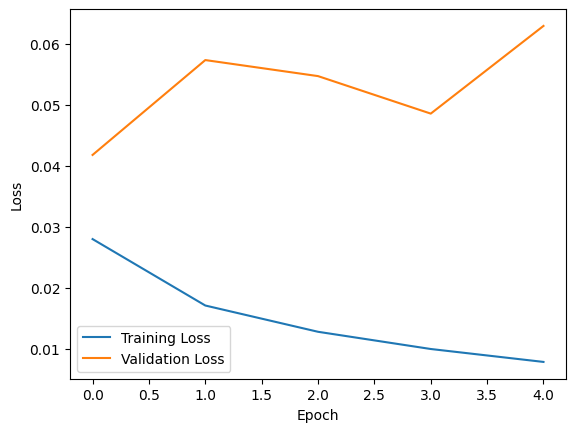

In [29]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

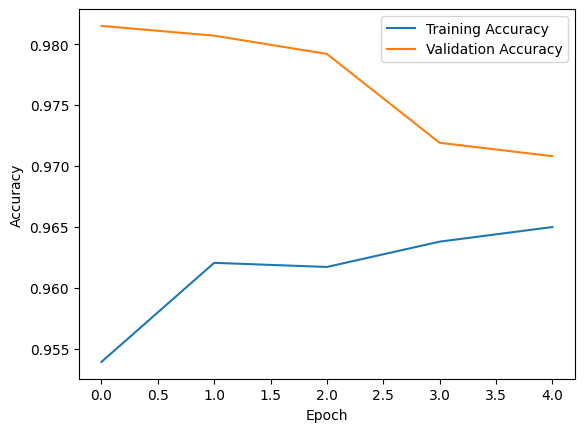

In [30]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
